In [242]:
import numpy as np

target = np.load("target_0.npy" ,allow_pickle=True)
target = target.reshape(target.size)
        
output = np.load("output_0.npy",allow_pickle=True)
output = output.reshape(int(output.size/5), 5)
       
preds = np.load("preds_0.npy",allow_pickle=True)
preds = preds.reshape(preds.size)

In [243]:
import torch
stacked = torch.stack(
    (
        torch.Tensor(target)
        , torch.Tensor(preds)
    )
    ,dim=1
)
stacked = stacked.int()

In [244]:
cmt = torch.zeros(5,5, dtype=torch.int32)

In [245]:
for p in stacked:
    tl, pl = p.tolist()
    cmt[tl, pl] = cmt[tl, pl] + 1

In [306]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    #cb=plt.colorbar()
    #cb.ax.tick_params(labelsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=18)
    plt.yticks(tick_marks, classes, fontsize=18)
    plt.ylim(len(cm) - 0.5, -0.5)

    fmt = '.0f' if normalize else 'd'
    thresh = cm.max() / 2.
    cm = cmt
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > 100 else "black", fontsize=20)

    plt.tight_layout()
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    

In [307]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

Normalized confusion matrix
[[9.99539665e-01 3.06889673e-04 0.00000000e+00 7.67224183e-05
  7.67224183e-05]
 [6.23441397e-04 9.98129676e-01 0.00000000e+00 6.23441397e-04
  6.23441397e-04]
 [2.64550265e-03 0.00000000e+00 9.97354497e-01 0.00000000e+00
  0.00000000e+00]
 [6.07287449e-02 0.00000000e+00 0.00000000e+00 9.37246964e-01
  2.02429150e-03]
 [4.29184549e-03 3.57653791e-03 0.00000000e+00 7.15307582e-04
  9.91416309e-01]]


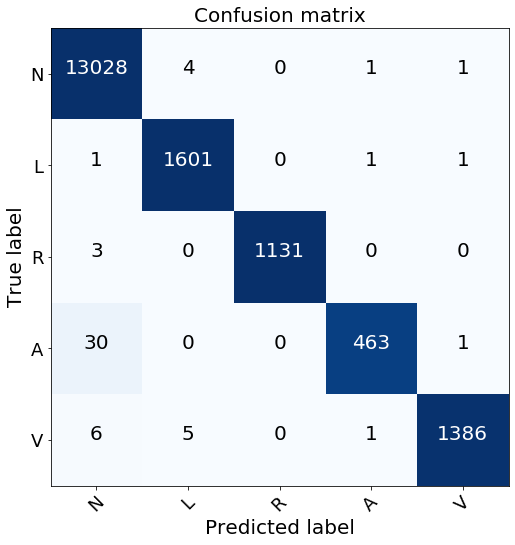

In [308]:
names = (
    "N", "L", "R", "A", "V"
)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cmt, names)


In [249]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test = label_binarize(target, classes=[0, 1, 2, 3, 4])
n_classes = y_test.shape[1]
y_score = output

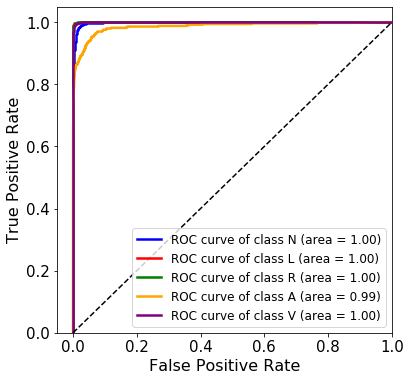

In [250]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green', 'orange', 'purple']
label = ["N", "L", "R", "A", "V"]
plt.figure(figsize=(6,6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, #lw=lw,
             #label='ROC curve of class {0} (area = {1:0.2f})'
             label='ROC curve of class %s (area = {1:0.2f})'
             ''.format(i, roc_auc[i]) %label[i] ,linewidth=2.5)
plt.plot([0, 1], [0, 1], 'k--'), #lw=lw)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
#plt.title('Receiver operating characteristic for multi-class data', fontsize=20)
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [251]:
TP = []
TN = []
TPFN = []
TPFP = []
Precision = []
Recall = []
F1 = []
cmt = cmt.numpy()

In [252]:
for i in range(n_classes):
    TP.append(cmt[0,0]+cmt[1,1]+cmt[2,2]+cmt[3,3]+cmt[4,4]-cmt[i,i])
    TN.append(cmt[i,i])
    TPFN.append(sum(cmt[0,:])+sum(cmt[1,:])+sum(cmt[2,:])+sum(cmt[3,:])+sum(cmt[4,:])-sum(cmt[i,:]))
    TPFP.append(sum(cmt[:,0])+sum(cmt[:,1])+sum(cmt[:,2])+sum(cmt[:,3])+sum(cmt[:,4])-sum(cmt[:,i]))
    Precision.append(TP[i]/TPFN[i])
    Recall.append(TP[i]/TPFP[i])
    F1.append((2*Precision[i]*Recall[i])/(Precision[i]+Recall[i]))

In [253]:
macro_Precision = np.mean(Precision)
macro_Recall = np.mean(Recall)
macro_F1 = np.mean(F1)
ave_macro_Precision.append(macro_Precision)
ave_macro_Recall.append(macro_Recall)
ave_macro_F1.append(macro_F1)

In [254]:
print("macro_Precision", macro_Precision)
print("macro_Recall", macro_Recall)
print("macro_F1", macro_F1)

macro_Precision 0.9953369452567621
macro_Recall 0.9963974964254667
macro_F1 0.9958644257887656
